In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp




import scipy.stats as stats
from scipy.optimize import minimize_scalar
from scipy import signal
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.tsa.stattools as smt
from scipy.optimize import curve_fit

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.tsatools import detrend

from statsmodels.tsa.vector_ar.vecm import coint_johansen
import sklearn
from sklearn.neighbors import KernelDensity

### Replication of single-run plots

In [41]:
df_1 = pd.read_csv('validation_samples/valoutput_2.csv')

In [42]:
T = range(len(df_1.GDP))

In [43]:
def indexnumber(ts):
    return 100 * ts / ts[0]

In [44]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [45]:
# Set parameters for bandpass filters
bk_low = 18
bk_high = 96
bk_K = 36

* SF1 Endogenous and self-sustained growth of output, with persistent fluctuations.
* SF4 Aggregate consumption is less volatile than GDP, and aggregate investments are
more volatile than GDP.
* SF6 Synchronization of the business cycle and emission dynamics.

(Partial) replication of Dosi (2010) fig 1 and 2, Lamperti et al (2018) fig 2 and 8

In [46]:
real_GDP_1 = df_1.GDP.iloc[300:].to_numpy() / df_1.prices.iloc[300:].to_numpy()
real_C = df_1.C.iloc[300:].to_numpy() / df_1.prices.iloc[300:].to_numpy()
real_I = df_1.I.iloc[300:].to_numpy() / df_1.prices.iloc[300:].to_numpy()

In [47]:
x = np.arange(0, 361, 60)
years = np.arange(2020, 2051, 5)

gdp_filtered = sm.tsa.filters.bkfilter(np.log(real_GDP_1), bk_low, bk_high, bk_K)
C_filtered = sm.tsa.filters.bkfilter(np.log(real_C), bk_low, bk_high, bk_K)
I_filtered = sm.tsa.filters.bkfilter(np.log(real_I), bk_low, bk_high, bk_K)

Em_filtered = sm.tsa.filters.bkfilter(np.log(df_1.Em.iloc[300:].to_numpy()), bk_low, bk_high, bk_K)
EnDem_filtered = sm.tsa.filters.bkfilter(np.log(df_1.EnDem.iloc[300:].to_numpy()), bk_low, bk_high, bk_K)

T_filter = range(len(gdp_filtered))

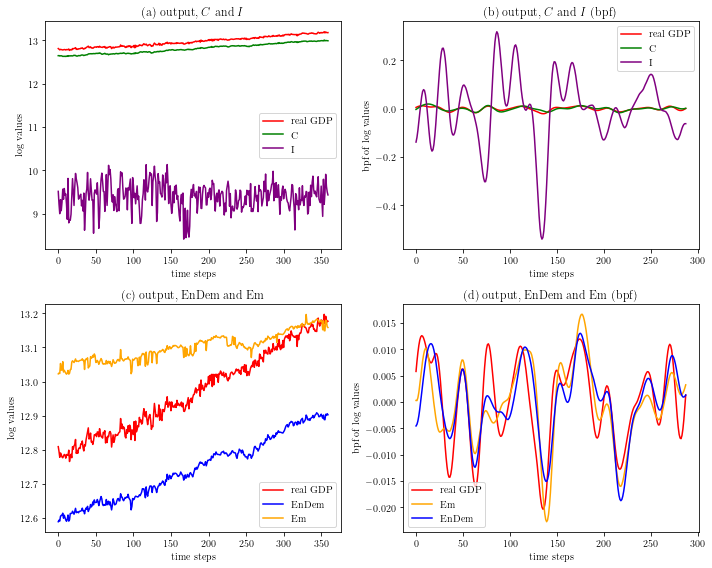

In [48]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(10,8))

ax1.plot(np.log(real_GDP_1), label='real GDP', color='red')
ax1.plot(np.log(real_C), label='C', color='green')
ax1.plot(np.log(real_I), label='I', color='purple')
ax1.set_ylabel('log values')
ax1.set_xlabel('time steps')
ax1.set_title('(a) output, $C$ and $I$')
ax1.legend()

ax2.plot(gdp_filtered, label='real GDP', color='red')
ax2.plot(C_filtered, label='C', color='green')
ax2.plot(I_filtered, label='I', color='purple')
ax2.set_xlabel('time steps')
ax2.set_ylabel('bpf of log values')
ax2.set_title('(b) output, $C$ and $I$ (bpf)')
ax2.legend()

ax3.plot(np.log(real_GDP_1), label='real GDP', color='red')
ax3.plot(np.log(df_1.EnDem.iloc[300:].to_numpy()), label='EnDem', color='blue')
ax3.plot(np.log(df_1.Em.iloc[300:].to_numpy()), label='Em', color='orange')
ax3.set_xlabel('time steps')
ax3.set_ylabel('log values')
ax3.set_title('(c) output, EnDem and Em')
ax3.legend()

ax4.plot(gdp_filtered, label='real GDP', color='red')
ax4.plot(Em_filtered, label='Em', color='orange')
ax4.plot(EnDem_filtered, label='EnDem', color='blue')
ax4.set_xlabel('time steps')
ax4.set_ylabel('bpf of log values')
ax4.set_title('(d) output, EnDem and Em (bpf)')
ax4.legend()

plt.tight_layout()
plt.savefig('../validation/timeseries_gdp.pdf', bbox_inches='tight')
plt.show()

(Partial) replication of Lamperti et al (2018) fig 7

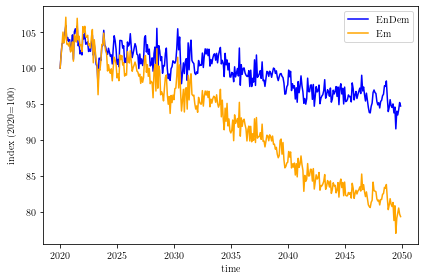

In [49]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(indexnumber(df_1.EnDem.iloc[300:].to_numpy() / real_GDP_1), c='blue', label='EnDem')
ax.set_xlabel('time')
ax.set_ylabel('index (2020=100)')
ax.set_xticks(x, years)

ax.plot(indexnumber(df_1.Em.iloc[300:].to_numpy() / real_GDP_1), c='orange', label='Em')
ax.set_xlabel('time')
ax.set_xticks(x, years)

ax.legend()

plt.tight_layout()
plt.savefig('../validation/Em_EnDem.pdf', bbox_inches='tight')
plt.show()

## Firm characteristics

In [50]:
df_firms = pd.read_csv('validation_samples/valfirmdata_2.csv')
df_firms.head()

FileNotFoundError: [Errno 2] No such file or directory: 'validation_samples/valfirmdata_2.csv'

In [ ]:
start_t = 300

In [ ]:
def mean_std_firmdata(colstart):
    all_ts = [col for col in df_firms if col.startswith(colstart)]
    ts_mean = df_firms[all_ts].iloc[start_t:].mean(axis=1)
    ts_std = df_firms[all_ts].iloc[start_t:].std(axis=1)
    return ts_mean, ts_std

(Partial) replication of Dosi (2010) fig 5

NameError: name 'mean_std_firmdata' is not defined

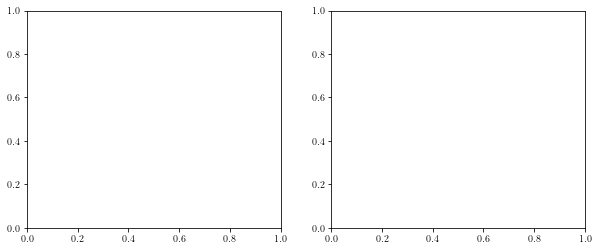

In [51]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 4))

for colstart, color, label in zip(['LPcp', 'EEcp', 'EFcp'], ['blue', 'red', 'green'], ['$\\bar{A}^{LP}$', '$\\bar{A}^{EE}$', '$\\bar{A}^{EF}$']):
    ts_mean, ts_std = mean_std_firmdata(colstart)
    ax1.plot(ts_mean, color=color, label=label)
    ax1.fill_between(np.arange(300,660), ts_mean + 2 * ts_std, ts_mean - 2 * ts_std, alpha=0.5, color=color)

ax1.legend(loc='upper left')
ax1.set_xlabel('periods')
ax1.set_ylabel('technology level')
ax1.set_title('(a) consumer good producers')

for colstart, color, label in zip(['LPkp', 'EEkp', 'EFkp'], ['blue', 'red', 'green'], ['$\\bar{B}^{LP}$', '$\\bar{B}^{EE}$', '$\\bar{B}^{EF}$']):
    ts_mean, ts_std = mean_std_firmdata(colstart)
    ax2.plot(ts_mean, color=color, label=label)
    ax2.fill_between(np.arange(300,660), ts_mean + 2 * ts_std, ts_mean - 2 * ts_std, alpha=0.5, color=color)

ax2.legend(loc='upper left')
ax2.set_xlabel('periods')
ax2.set_ylabel('technology level')
ax2.set_title('(a) capital good producers')

plt.tight_layout()
plt.savefig('../../plotting/validation/tech_het.pdf', bbox_inches='tight')
plt.show()

(Partial) replication of Dosi (2010) fig 6

In [ ]:
I_cols = [col for col in df_firms if col.startswith("Icp")]
K_cols = [col for col in df_firms if col.startswith("Kcp")]
I_ratio = df_firms[I_cols].to_numpy() / df_firms[K_cols].to_numpy()

In [ ]:
# Make investment ratio's quarterly
I_month = df_firms[I_cols].to_numpy()
K_month = df_firms[K_cols].to_numpy()

I_ratio_quarterly = np.array([np.sum(I_month[i:i+3, :] / K_month[i:i+3, :], axis=0) for i in np.arange(0, 660, step=3)])

In [ ]:
counts = np.zeros((50, 120))

for col in range(120):
    for i, row in enumerate(np.arange(0.0, 0.5, step=0.01)):
        counts[i, col] = ((I_ratio_quarterly >= row) & (I_ratio_quarterly < row + 0.1)).sum() / I_ratio_quarterly[:, col].sum()

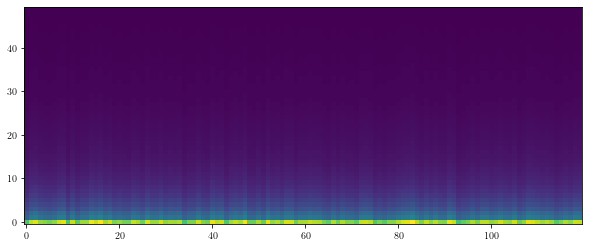

In [ ]:
plt.figure(figsize=(10, 4))
plt.imshow(counts, aspect='auto', origin='lower')
plt.show()

In [52]:
plt.figure(figsize=(8, 4))
plt.plot(np.sum(I_ratio_quarterly >= 0.2, axis=1) / 200, label='$I/K \geq 0.2$', color='blue')
plt.plot(np.sum(I_ratio_quarterly <= 0.02, axis=1) / 200, label='$I/K \leq 0.02$', color='red')

plt.xlim(99, 219)
plt.ylim(0, 1)
plt.xticks(np.arange(99, 220, step=20), np.arange(0, 121, step=20))
plt.xlabel('quarters')
plt.ylabel('percentage')
plt.legend()

plt.tight_layout()
plt.savefig('../../plotting/validation/lumpiness.pdf', bbox_inches='tight')
plt.show()

NameError: name 'I_ratio_quarterly' is not defined

<Figure size 576x288 with 0 Axes>

In [53]:
S_cp_cols = [col for col in df_firms if col.startswith('Scp')]
S_cp_month = df_firms[S_cp_cols].to_numpy()[300:,:]

print(S_cp_month.shape)

# Pool data to be yearly
S_cp_year = np.array([np.sum(S_cp_month[i:i+3, :], axis=0) for i in np.arange(0, 360, step=3)])

print(S_cp_year.shape)


S_cp_year_mean = np.mean(S_cp_year, axis=1)

print(S_cp_year_mean)

S_cp_year_norm = np.transpose(np.transpose(S_cp_year) / S_cp_year_mean)
S_cp_year_norm = np.sort(S_cp_year_norm.flatten())[::-1]


NameError: name 'df_firms' is not defined

In [54]:
firm_gr = (S_cp_year[:, 1:] - S_cp_year[:, :-1]) / S_cp_year[:, :-1]

plt.hist(firm_gr.flatten(), bins=100)
plt.show()

NameError: name 'S_cp_year' is not defined

In [55]:
print(S_cp_year_norm.shape)

NameError: name 'S_cp_year_norm' is not defined

In [56]:
s, loc, scale = stats.lognorm.fit(S_cp_year_norm)

S_fitted = stats.lognorm.rvs(s, loc, scale, size=len(S_cp_year_norm))
rv = stats.lognorm(s, loc, scale)
# S_fitted = np.sort(S_fitted)[::-1]

NameError: name 'S_cp_year_norm' is not defined

In [57]:
x = np.linspace(min(S_cp_year_norm), max(S_cp_year_norm), 1000)
plt.hist(S_cp_year_norm, bins=100, density=True)
plt.plot(x, rv.pdf(x))
plt.show()

print(min(S_cp_year_norm))
print(max(S_cp_year_norm))

NameError: name 'S_cp_year_norm' is not defined

In [58]:
firmsizetable = {}

jb_val, p_val = stats.jarque_bera(np.log(S_cp_year_norm))
print(jb_val, p_val)

firmsizetable['Jarque-Bera'] = [jb_val, round(p_val, 2)]

stat, p_val = stats.shapiro(np.log(S_cp_year_norm))
print(stat, p_val)

firmsizetable['Shapiro-Wilkes'] = [stat, round(p_val, 2)]

stat, crit, p_val = stats.anderson(np.log(S_cp_year_norm), dist='norm')
print(stat, crit, p_val)

firmsizetable['Anderson-Darling'] = [stat, 0.0]

df_firmtable = pd.DataFrame(firmsizetable, index=['test stat', 'p-val']).round(2)
print(df_firmtable.head())

print(df_firmtable.to_latex())

NameError: name 'S_cp_year_norm' is not defined

In [59]:
x = np.linspace(min(S_cp_year_norm), max(S_cp_year_norm), 1000)
plt.plot(S_cp_year_norm, range(len(S_cp_year_norm)), c='black')
plt.plot(S_fitted, range(len(S_fitted)))
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('normalized firm size')
plt.ylabel('rank')
plt.show()

NameError: name 'S_cp_year_norm' is not defined

## Income and wealth distributions

In [60]:
def powerlaw(x, alpha, beta):
    return beta * x ** (-1 - alpha)

In [61]:
df_I_W = pd.read_csv('../result_data/final_income_dists.csv')

start_60 = round(20/100 * 2500)
end_60 = round(80/100 * 2500)

I_sorted = np.sort(df_I_W.all_I.to_numpy())
I_share = sum(I_sorted[start_60:end_60]) / sum(I_sorted)
print("I share:", I_share)

W_sorted = np.sort(df_I_W.all_W.to_numpy())
W_share = sum(W_sorted[start_60:end_60]) / sum(W_sorted)
print("W share:", W_share)

FileNotFoundError: [Errno 2] No such file or directory: '../result_data/final_income_dists.csv'

NameError: name 'df_I_W' is not defined

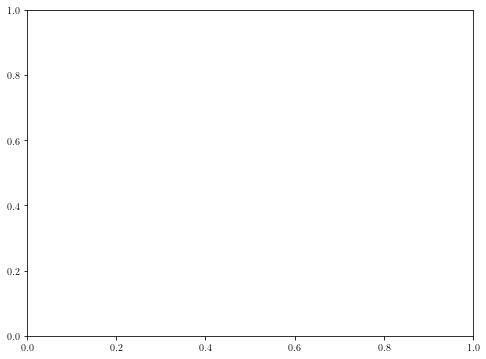

In [62]:
fig, ax = plt.subplots(figsize=(8,6))

dens, bins, _ = ax.hist(df_I_W.all_W, bins=25, density=True, alpha=0.5)
ax.hist(df_I_W.all_I, bins=25, density=True, alpha=0.5)
bins1 = bins[:-1]
bins2 = bins[1:]
bins = np.mean([bins1, bins2], axis=0)

idx = np.where(dens != 0)[0][10:]
[alpha_hat, beta_hat], [alpha_cov, beta_cov] = curve_fit(powerlaw, bins[idx], dens[idx])
start_W = 2200

ax.scatter(bins, dens, s=10, color='black')
ax.set_title('(b) Wealth ($W_{i,t}$)')
ax.set_xlim(0, max(df_I_W.all_W))
# ax.set_ylim(min(dens), max(dens))

ax.set_ylabel('density')
ax.set_xlabel('wealth')
ax.legend(loc='lower left')

# start_W = 2350

start_main = 100

dens_cumm = np.cumsum(dens[::-1])[::-1] / np.sum(dens)

s, loc, scale = stats.lognorm.fit(W_sorted[start_main:start_W])

axins = ax.inset_axes([0.5, 0.5, 0.48, 0.48])
# axins.plot(W_sorted[start_W:], powerlaw(W_sorted[start_W:], alpha_hat, beta_hat), color='red')
axins.plot(W_sorted[start_main:start_W][::-1], stats.lognorm.cdf(W_sorted[start_main:start_W][::-1], s, loc, scale), color='red')
# axins.plot(W_sorted[2250:], stats.powerlaw.pdf(W_sorted[2250:], a, loc, scale))
axins.set_yscale('log')
axins.set_xscale('log')
axins.set_ylabel('$\\log (P[W])$')
axins.set_xlabel('$\\log (W)$')
axins.scatter(bins, dens_cumm, s=8, color='black')

plt.tight_layout()
plt.show()

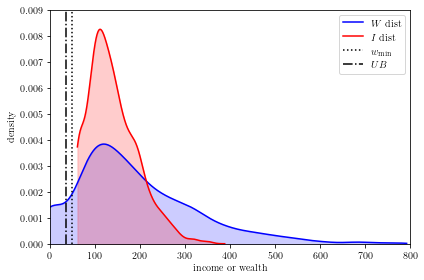

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

kde = stats.gaussian_kde(df_I_W.all_W.to_numpy())

W_range = np.linspace(min(df_I_W.all_W), max(df_I_W.all_W), 1000)
prob = kde(W_range)

ax.plot(W_range, prob, label='$W$ dist', color='blue')
ax.fill_between(W_range, prob, alpha=0.2, color='blue')

kde = stats.gaussian_kde(df_I_W.all_I.to_numpy())

I_range = np.linspace(min(df_I_W.all_I), max(df_I_W.all_I), 1000)
prob = kde(I_range)

ax.plot(I_range, prob, label='$I$ dist', color='red')
ax.fill_between(I_range, prob, alpha=0.2, color='red')

ax.set_xlim(0, 800)
ax.set_ylim(0.0, 0.009)
ax.set_xlabel('income or wealth')
ax.set_ylabel('density')

ax.axvline(50, c='black', linestyle='dotted', label='$w_{\min}$')
ax.axvline(35, c='black', linestyle='dashdot', label='$UB$')
ax.legend()

plt.tight_layout()
plt.savefig('../../plotting/validation/I_W_dist.pdf', bbox_inches='tight')
plt.show()

NameError: name 'df_I_W' is not defined

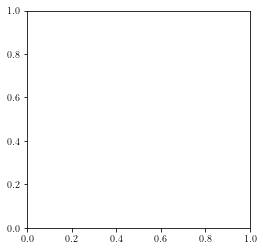

In [63]:
fig, ax = plt.subplots(figsize=(4, 4))

W_sorted = np.sort(df_I_W.all_W)
I_sorted = np.sort(df_I_W.all_I)

ax.plot(100 * np.linspace(0, 1, len(W_sorted)), 100 * np.cumsum(W_sorted) / np.sum(W_sorted), color='blue', label='$W$')
ax.plot(100 * np.linspace(0, 1, len(W_sorted)), 100 * np.cumsum(I_sorted) / np.sum(I_sorted), color='red', label='$I$')
ax.plot([0, 100], [0, 100], linestyle='dashed', c='black', label='$45^\circ$')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.legend()
ax.set_xlabel('cumulative share of households')
ax.set_ylabel('cumulative share of total wealth')

plt.tight_layout()
plt.savefig('../../plotting/validation/lorenz.pdf', bbox_inches='tight')
plt.show()

In [64]:
print(np.arange(0, 1, step=0.1))

W_sorted = np.sort(df_I_W.all_W)

plt.plot(np.cumsum(W_sorted) / np.sum(W_sorted))

W_quatiles = np.quantile(df_I_W.all_W.to_numpy(), np.arange(0, 1, step=0.1))

print(W_quatiles)

# W_counts = np.count()

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


NameError: name 'df_I_W' is not defined

## Aggregate results

In [108]:
# Open all validation files

def filepath(i):
    return f'validation_samples/valoutput_{i}.csv'

# n_MC = 100
n_MC = 10

df_list = []
for MC_i in range(1, n_MC + 1):
    #df_list.append(pd.read_csv(filepath(MC_i)).iloc[550:650])
    df_list.append(pd.read_csv(filepath(MC_i)).iloc[300:])
    #FIXME adjust sampling window
df = pd.concat(df_list)

* SF7 Co-integration of output, energy demand and emissions.

(Partial) reproduction of table 3

In [109]:
df.head()

,C,Em,EmIndex,EnDem,EnPerc,GDP,GDP_growth,GINI_I,GINI_W,I,...,avg_π_LP,bankrupty_cp,dU,inventories,markups,prices,total_Q_cp,total_Q_growth,total_Q_kp,wages
550,510211.614617,529162.142164,118.291436,385572.186645,0.341406,608247.761086,2.665995,0.203483,0.362840,15027.776945,...,1.753201,0.005,61.111111,44376.677158,0.229739,1.294525,395841.199863,-0.003175,12650.0,1.552237
551,516778.430905,530658.662617,118.625976,387198.629976,0.340443,618164.167831,3.613579,0.206918,0.365982,14719.623821,...,1.766853,0.000,9.523810,43751.611007,0.229739,1.292778,399019.252096,0.008014,11050.0,1.552215
552,518164.857541,531374.248210,118.785941,388052.714421,0.339985,617712.439876,4.555965,0.205233,0.367128,12458.500673,...,1.772415,0.005,3.361345,41542.426170,0.231005,1.286070,400537.294228,0.002904,10300.0,1.546103
553,516883.296489,531470.847509,118.807535,388408.960674,0.339923,624562.859371,2.908380,0.203083,0.365650,17387.220731,...,1.769875,0.005,-30.344828,39287.527613,0.232712,1.291681,398036.422689,0.006720,13200.0,1.552386
554,524308.680853,531275.400626,118.763844,388322.067134,0.340048,635244.082800,2.769492,0.201982,0.365410,22112.162229,...,1.771430,0.010,-31.159420,29612.939367,0.232712,1.292696,395624.312481,0.002207,15350.0,1.550699


In [110]:
gdp_detrend = sm.tsa.tsatools.detrend(df_list[0].GDP / df_list[0].prices)
EnDem_detrend = sm.tsa.tsatools.detrend(df_list[0].EnDem)

# plt.plot(np.log(df_list[1].total_Q_cp))
# plt.plot(np.log(df_list[1].EnDem))

coint_t, pval, crit = sm.tsa.stattools.coint(
    df_list[1].GDP / df_list[1].prices, 
    df_list[1].EnDem, 
    trend='ct',
    autolag=None,
    maxlag=10
)
print(coint_t, pval, crit)

-3.099804651209901 0.22261451111564556 [-4.48720681 -3.87786858 -3.56858685]


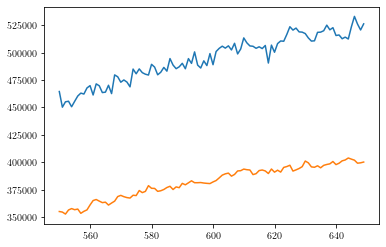

In [111]:
plt.plot(df_list[1].GDP / df_list[1].prices)
plt.plot(df_list[1].EnDem)

In [112]:
X = sm.add_constant(sm.tsa.tsatools.detrend(df_list[2].EnDem))
Y = (sm.tsa.tsatools.detrend(df_list[2].GDP / df_list[2].prices))

# print(X, Y)

mod = sm.OLS(Y, X)

res = mod.fit()

const, beta = res.params[0], res.params[1]

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     37.74
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.73e-08
Time:                        10:05:06   Log-Likelihood:                -1025.6
No. Observations:                 100   AIC:                             2055.
Df Residuals:                      98   BIC:                             2060.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.566e-11    695.697   3.69e-14      1.0

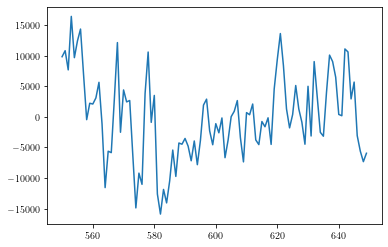

In [113]:
u = Y - beta * X.EnDem

plt.plot(u)
plt.show()

In [114]:
print(sm.tsa.stattools.adfuller(u))

(-2.9373739394320513, 0.04117134560100258, 4, 95, {'1%': -3.5011373281819504, '5%': -2.8924800524857854, '10%': -2.5832749307479226}, 1738.9817442625204)


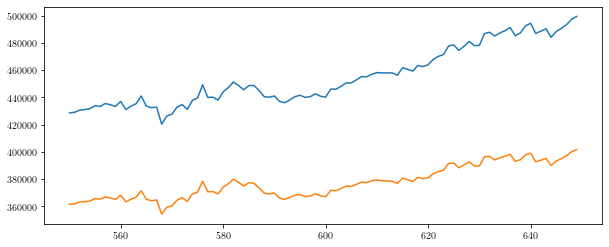

In [115]:
plt.figure(figsize=(10,4))
plt.plot(df_list[2].total_Q_cp + df_list[2].total_Q_kp)
plt.plot(df_list[2].EnDem)

In [116]:
coint_table = {}

t_stat_tot_1 = 0
n_passes_1 = 0

t_stat_tot_2 = 0
n_passes_2 = 0

t_stat_tot_3 = 0
n_passes_3 = 0

for df_i in df_list[1:3]:

    # real_gdp = df_i.GDP / df_i.prices
    real_gdp = df_i.total_Q_cp + df_i.total_Q_kp
    # real_gdp = df_i.total_Q_cp + df_i.total_Q_kp

    # endem_det = sm.tsa.tsatools.detrend(df_i.EnDem)
    # gdp_det = sm.tsa.tsatools.detrend(real_gdp)

    coint_t, pval, crit = sm.tsa.stattools.coint(df_i.EnDem, real_gdp, trend='ct')
    # res = coint_johansen(np.transpose([np.log(real_gdp), np.log(df_i.EnDem)]), det_order=1, k_ar_diff=9)
    # print(res.lr1, res.cvm)
    # coint_table['Output-EnDem'] = [round(coint_t, 2), round(pval, 2)]

    print(coint_t, pval, crit)

    t_stat_tot_1 += coint_t
    if pval <= 0.05:
        n_passes_1 += 1

    # print(coint_t, pval, crit)

    coint_t, pval, crit = sm.tsa.stattools.coint(df_i.EnDem, real_gdp, trend='ct')
    coint_table['Em-Output'] = [round(coint_t, 2), round(pval, 2)]

    # print(pval)

    t_stat_tot_2 += coint_t
    if pval <= 0.05:
        n_passes_2 += 1

    # print(coint_t, pval, crit)

    coint_t, pval, crit = sm.tsa.stattools.coint(df_i.Em, df_i.EnDem, trend='ctt')
    coint_table['Em-EnDem'] = [round(coint_t, 2), round(pval, 2)]

    # print(pval)

    t_stat_tot_3 += coint_t
    if pval <= 0.05:
        n_passes_3 += 1

0.5381470471895474 0.9987344413385238 [-4.48720681 -3.87786858 -3.56858685]
-2.76332060403144 0.3773440390153375 [-4.48720681 -3.87786858 -3.56858685]


In [117]:
print(t_stat_tot_1 / len(df_list), t_stat_tot_2 / len(df_list), t_stat_tot_3 / len(df_list))
print(n_passes_1 / len(df_list), n_passes_2 / len(df_list), n_passes_3 / len(df_list))

-0.2225173556841893 -0.2225173556841893 -1.2737299682944188
0.0 0.0 0.1


* SF13 wealth is more concentrated at the top than at the bottom

In [118]:
all_gini_W = np.array([df.GINI_W.to_numpy() for df in df_list])
all_gini_I = np.array([df.GINI_I.to_numpy() for df in df_list])

ValueError: operands could not be broadcast together with shapes (360,) (100,) 

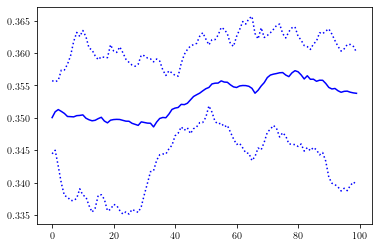

In [119]:
# res = stats.bootstrap((all_gini_W,), np.mean, method='percentile')

perc75 = np.percentile(all_gini_W, [12.5, 81.5], axis=0)
plt.plot(np.mean(all_gini_W, axis=0), color='blue', label='Wealth GINI')
plt.plot(perc75[0], color='blue', linestyle='dotted')
plt.plot(perc75[1], color='blue', linestyle='dotted')
plt.fill_between(np.arange(360), perc75[0], perc75[1], alpha=0.2, color='blue')


perc75 = np.percentile(all_gini_I, [12.5, 81.5], axis=0)
plt.plot(np.mean(all_gini_I, axis=0), color='red', label='Wealth GINI')
plt.plot(perc75[0], color='red', linestyle='dotted')
plt.plot(perc75[1], color='red', linestyle='dotted')
plt.fill_between(np.arange(360), perc75[0], perc75[1], alpha=0.2, color='red')

plt.legend(loc='upper right')
plt.xlim(0, 360)
plt.xlabel('periods')
plt.ylabel('GINI')

plt.tight_layout()
plt.savefig('../../plotting/validation/wealth_income_gini.pdf')
plt.show()

* SF2 The distribution of GDP growth rates is fat-tailed.

(Partial) reproduction of Dosi (2017) fig 2

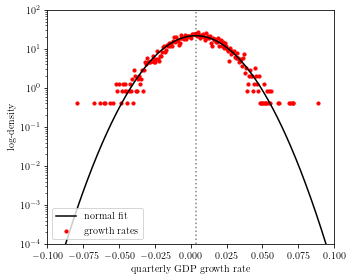

In [ ]:
plt.figure(figsize=(5, 4))

data = df.GDP_growth / 100
mean_GDP_growth = np.mean(data)
x = np.linspace(-0.1, 0.1, 1000)
dens, bins, _ = plt.hist(data, bins=250, density=True, alpha=0.)
mu, sigma = stats.norm.fit(data)
best_fit_line = stats.norm.pdf(x, mu, sigma)
bins1 = bins[:-1]
bins2 = bins[1:]



bins = np.mean([bins1, bins2], axis=0)
plt.plot(x, best_fit_line, color='black', label='normal fit')
plt.scatter(bins, dens, s=10, c='red', label='growth rates')
plt.legend(loc='lower left')
plt.xlabel('quarterly GDP growth rate')
plt.ylabel('log-density')
plt.xlim(-0.1, 0.1)
plt.ylim(10e-5, 100)
plt.axvline(mean_GDP_growth, linestyle='dotted', alpha=0.5, c='black')

plt.yscale('log')
plt.tight_layout()
plt.savefig('../../plotting/validation/gr_dist.pdf', bbox_inches='tight')
plt.show()

In [ ]:
z_gdp_sk_gr, p_gdp_sk_gr = stats.skewtest(data)
z_gdp_kt_gr, p_gdp_kt_gr = stats.kurtosistest(data)

print(z_gdp_kt_gr, z_gdp_sk_gr, p_gdp_kt_gr, p_gdp_sk_gr)

4.871379995133331 -1.2207246428532676 1.108214659458926e-06 0.22219029412132263


In [ ]:
# U_filtered = sm.tsa.filters.bkfilter(np.log(df.U), bk_low, bk_high, bk_K)
# LIS_filtered = sm.tsa.filters.bkfilter(df.LIS, bk_low, bk_high, bk_K)
# C_filtered = sm.tsa.filters.bkfilter(np.log(df.C / df.prices), bk_low, bk_high, bk_K)
# I_filtered = sm.tsa.filters.bkfilter(np.log(df.I / df.prices), bk_low, bk_high, bk_K)
# Em_filtered = sm.tsa.filters.bkfilter(np.log(df.Em), bk_low, bk_high, bk_K)
# EnDem_filtered = sm.tsa.filters.bkfilter(np.log(df.EnDem), bk_low, bk_high, bk_K)
# TotDebt_filtered = sm.tsa.filters.bkfilter(np.log(df.TotDebt / df.prices), bk_low, bk_high, bk_K)
# prices_filtered = sm.tsa.filters.bkfilter(np.log(df.prices), bk_low, bk_high, bk_K)

* SF3 The duration of recessions is exponentially distributed.

(Partial) reproduction of Dosi (2017) fig 3

In [ ]:
# Count recession periods
durations = []

for df_i in df_list:

    recession = False
    duration = 0

    for g in df_i.GDP_growth:

        if g < 0:
            if recession:
                duration += 1
            else:
                recession = True
                duration = 1
            
        elif g > 0 and recession:
            recession = False
            durations += [duration]

durations = np.array(durations)

In [ ]:
loc, scale = stats.expon.fit(durations)

In [ ]:
counts = {}
for d in durations:
    if d not in counts:
        counts[d] = 1
    else:
        counts[d] += 1

totcount = sum(counts.values())

for c in counts:
    counts[c] /= totcount

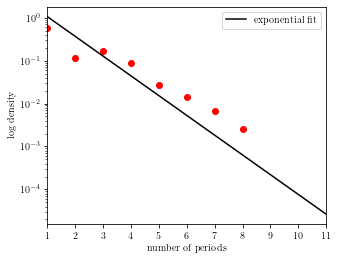

In [ ]:
plt.figure(figsize=(5,4))

# dens, bins, _, plt.hist(durations, bins=11, density=True)

x = np.linspace(1, 11, 100)

plt.plot(x, stats.expon.pdf(x, loc, scale), label='exponential fit', c='black')
plt.scatter(counts.keys(), counts.values(), color='red')
# plt.scatter(np.linspace(1, max(bins), len(dens)), dens, label='simulated data', c='red', s=30, zorder=2)
plt.xlim(1, 11)
plt.xticks(range(1, 12))
plt.yscale('log')
plt.xlabel('number of periods')
plt.ylabel('log density')
plt.legend()

plt.savefig('../../plotting/validation/rec_fit.pdf', bbox_inches='tight')
plt.show()

In [ ]:
print(stats.kstest(durations[np.where(durations > 2)], 'expon'))

KstestResult(statistic=0.950212931632136, pvalue=1.076644121595476e-302)


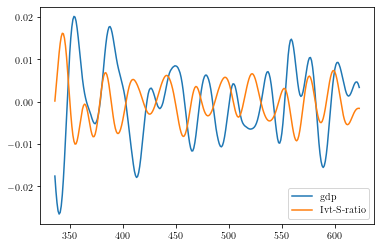

In [ ]:
real_wages_filtered = sm.tsa.filters.bkfilter(np.log(df_list[0].wages / df_list[0].prices), bk_low, bk_high, bk_K)
noml_wages_filtered = sm.tsa.filters.bkfilter(np.log(df_list[0].wages), bk_low, bk_high, bk_K)
real_gdp_filtered = sm.tsa.filters.bkfilter(np.log(df_list[0].GDP / df_list[0].prices), bk_low, bk_high, bk_K)
prices_filtered = sm.tsa.filters.bkfilter(np.log(df_list[0].prices), bk_low, bk_high, bk_K)
U_filtered = sm.tsa.filters.bkfilter(np.log(df_list[0].U), bk_low, bk_high, bk_K)
Inv_S_filtered = sm.tsa.filters.bkfilter(np.log(df_list[0].inventories / (df_list[0].C / df_list[0].prices)), bk_low, bk_high, bk_K)

# plt.plot(real_wages_filtered, label='real wages')
# plt.plot(noml_wages_filtered, label='wages')
plt.plot(real_gdp_filtered, label='gdp')
plt.plot(Inv_S_filtered / 50, label='Ivt-S-ratio')
# plt.plot(U_filtered / 50, label='U')
# plt.plot(prices_filtered)
plt.legend()

In [ ]:
real_wage_changes = (df_list[1].wages / df_list[1].prices).pct_change()[1:]
noml_wage_changes = df_list[1].wages.pct_change()[1:]
markup_changes = df_list[1].markups.pct_change()[1:]
price_changes = df_list[1].prices.pct_change()[1:]

# plt.scatter(real_wage_changes, markup_changes)
# plt.show()

# plt.scatter(noml_wage_changes, price_changes)
# plt.show()

# plt.scatter(markup_changes, price_changes)
# plt.show()

res = sm.OLS(price_changes, sm.add_constant(np.transpose([markup_changes, noml_wage_changes]))).fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                 prices   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5898
Date:                Mon, 01 May 2023   Prob (F-statistic):              0.555
Time:                        09:52:44   Log-Likelihood:                 1383.0
No. Observations:                 359   AIC:                            -2760.
Df Residuals:                     356   BIC:                            -2748.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.000     -4.507      0.0

/var/folders/n5/636hh_6s0pl03rdtjj6fd0vw0000gn/T/ipykernel_84999/219099565.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  real_wage_changes = (df_list[1].wages / df_list[1].prices).pct_change()[1:]
/var/folders/n5/636hh_6s0pl03rdtjj6fd0vw0000gn/T/ipykernel_84999/219099565.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  noml_wage_changes = df_list[1].wages.pct_change()[1:]
/var/folders/n5/636hh_6s0pl03rdtjj6fd0vw0000gn/T/ipykernel_84999/219099565.py:3: FutureWarning: The 

* SF5 Cross-correlations of macro-variables
    * Consumption, net investments, changes in inventories, productivity R&D investments, energy demand and nominal wages are pro-cyclical.
    * Unemployment and markups are counter-cyclical.
    * Real wages are a-cyclical.

* SF6 Synchronization of the business cycle and emission dynamics.

(Partial) replication of figure 4 in Lamperti et al (2018)

In [120]:
def compute_correlations(indicator, apply_bk=False, make_real=False, make_real_y=True, min_lag=-3, max_lag=3, y='GDP'):

    all_corr = []

    for df_part in df_list:

        # Apply filter
        if make_real_y:
            real_GDP =  df_part[y].to_numpy() / df_part.prices.to_numpy()
        else:
            real_GDP =  df_part[y].to_numpy()
        gdp_filtered = sm.tsa.filters.bkfilter(np.log(real_GDP), bk_low, bk_high, bk_K)

        # Prepare data
        ind_data = df_part[indicator].to_numpy()

        if indicator == 'inventories':
            ind_data = ind_data / (df_part['C'].to_numpy() / df_part['prices'].to_numpy())
        
        if make_real:
            ind_data = ind_data / df_part.prices.to_numpy()

        if apply_bk:
            ind_data = sm.tsa.filters.bkfilter(np.log(ind_data), bk_low, bk_high, bk_K)

        ccf_back = smt.ccf(gdp_filtered[::-1], ind_data[::-1])[1:-min_lag+1][::-1]
        ccf_forw = smt.ccf(gdp_filtered, ind_data)[:max_lag+1]
        ccf = np.concatenate((ccf_back, ccf_forw))

        all_corr.append([ccf])

    avg_corr = np.transpose(np.mean(np.array(all_corr), axis=0))

    return avg_corr

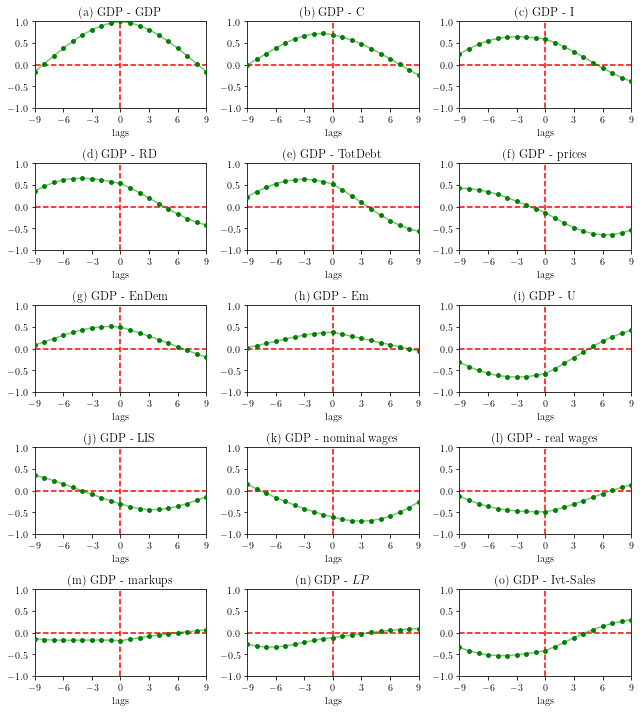

In [121]:
lags = 9
min_lag = -lags
max_lag = lags

indicators = ['GDP', 'C', 'I', 'RD', 'TotDebt', 'prices', 'EnDem', 'Em', 
              'U', 'LIS', 'wages', 'real wages', 'markups', 'avg_π_LP', 'inventories']
# indicators = ['GDP', 'C', 'I', 'U', 'EnDem', 'Em']
lags = np.arange(min_lag, max_lag + 1)

fig, axes = plt.subplots(5, 3, figsize=(9, 10))

for i, (indicator, ax) in enumerate(zip(indicators, axes.flatten())):

    fig_nr = chr(i + 97)

    title = indicator

    apply_bk = True
    make_real = True
    if indicator in ['markups', 'U', 'EnDem', 'Em', 'LIS', 'wages', 'prices', 'avg_π_LP', 'inventories']:
        make_real=False
        if indicator == 'wages':
            title = 'nominal wages'
        elif indicator == 'avg_π_LP':
            title = '$\\bar{LP}$'
        elif indicator == 'inventories':
            title = 'Ivt-Sales'

    if indicator == 'real wages':
        indicator = 'wages'

    all_r = compute_correlations(indicator, apply_bk=apply_bk, make_real=make_real,
                                        min_lag=min_lag, max_lag=max_lag)

    ax.hlines(0, min_lag, max_lag, linestyle='dashed', color='red')
    ax.vlines(0, -1., 1, linestyle='dashed', color='red')

    ax.scatter(lags, all_r, color='green', zorder=10, s=15)
    ax.plot(lags, all_r, alpha=0.5, color='green', zorder=9)

    ax.set_ylim(-1., 1.)
    ax.set_xlim(min_lag, max_lag)
    ax.set_xticks(np.linspace(min_lag, max_lag, 7))
    ax.set_yticks(np.linspace(-1, 1, 5))
    ax.set_title(f'({fig_nr}) GDP - {title}')
    ax.set_xlabel('lags')

plt.tight_layout()
# plt.savefig('../../plotting/validation/cross_correlations_short.pdf', bbox_inches='tight')
plt.show()

In [89]:
# Open all validation files

def filepath(i):
    return f'../experiments/OFAT_experiments/prog_-1.0_1_{i}.csv'

n_MC = 30

df_list = []
for MC_i in range(1, n_MC + 1):
    df_list.append(pd.read_csv(filepath(MC_i)).iloc[300:])

FileNotFoundError: [Errno 2] No such file or directory: '../experiments/OFAT_experiments/prog_-1.0_1_1.csv'

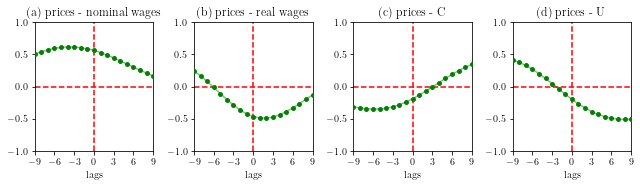

In [ ]:
lags = 9
min_lag = -lags
max_lag = lags

indicators = ['wages', 'real wages', 'C', 'U']
lags = np.arange(min_lag, max_lag + 1)

fig, axes = plt.subplots(1, len(indicators), figsize=(9, 2.7))

y = 'prices'

for i, (indicator, ax) in enumerate(zip(indicators, axes.flatten())):

    fig_nr = chr(i + 97)

    title = indicator

    apply_bk = True
    make_real = True
    if indicator in ['markups', 'U', 'EnDem', 'Em', 'LIS', 'wages', 'prices']:
        make_real=False
        if indicator == 'wages':
            title = 'nominal wages'

    if indicator == 'real wages':
        indicator = 'wages'

    all_r = compute_correlations(indicator, apply_bk=apply_bk, make_real=make_real, make_real_y=False,
                                        min_lag=min_lag, max_lag=max_lag, y=y)

    ax.hlines(0, min_lag, max_lag, linestyle='dashed', color='red')
    ax.vlines(0, -1., 1, linestyle='dashed', color='red')

    ax.scatter(lags, all_r, color='green', zorder=10, s=15)
    ax.plot(lags, all_r, alpha=0.5, color='green', zorder=9)

    ax.set_ylim(-1., 1.)
    ax.set_xlim(min_lag, max_lag)
    ax.set_xticks(np.linspace(min_lag, max_lag, 7))
    ax.set_yticks(np.linspace(-1, 1, 5))
    ax.set_title(f'({fig_nr}) {y} - {title}')
    ax.set_xlabel('lags')

plt.tight_layout()
# plt.savefig('../../plotting/validation/cross_correlations_U.pdf', bbox_inches='tight')
plt.show()

In [ ]:
filtered_series ={
    'GDP': sm.tsa.filters.bkfilter(np.log(df.GDP / df.prices), bk_low, bk_high, bk_K),
    '$\\hat{\\mu}$': sm.tsa.filters.bkfilter(df.markups, bk_low, bk_high, bk_K),
    'I': I_filtered.to_numpy(),
    'C': C_filtered.to_numpy(),
    'U': U_filtered.to_numpy(),
    'LIS': LIS_filtered.to_numpy(),
    'TotDebt': TotDebt_filtered.to_numpy(),
    'EnDem': EnDem_filtered.to_numpy(),
    'Em': Em_filtered.to_numpy()
}

df_filtered = pd.DataFrame(filtered_series)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [90]:
import seaborn as sb
# corr = df.corr()

plt.figure(figsize=(6,5))

sb.heatmap(df_filtered.corr(), cmap="vlag", annot=True)

plt.tight_layout()
plt.show()

NameError: name 'df_filtered' is not defined

<Figure size 432x360 with 0 Axes>

## Aggregate firm statistics

In [91]:
# Open all firm validation files

def filepath(i):
    return f'validation_samples/valfirmdata_{i}.csv'

n_MC = 100

df_list = []
for MC_i in range(1, n_MC + 1):
    df_list.append(pd.read_csv(filepath(MC_i)).iloc[300:])
# df = pd.concat(df_list)

FileNotFoundError: [Errno 2] No such file or directory: 'validation_samples/valfirmdata_1.csv'

In [92]:
all_firm_gr = []
all_firm_S_norm = []

for df_firm in df_list:

    S_cp_cols = [col for col in df_firms if col.startswith('Scp')]
    S_cp_month = df_firms[S_cp_cols].to_numpy()[300:,:]

    # print(S_cp_month.shape)

    # Pool data to be yearly
    S_cp_year = np.array([np.sum(S_cp_month[i:i+3, :], axis=0) for i in np.arange(0, 360, step=3)])

    S_cp_year_mean = np.mean(S_cp_year, axis=1)

    S_cp_year_norm = np.transpose(np.transpose(S_cp_year) / S_cp_year_mean)

    gr_firm = (S_cp_year_norm[:, 1:] - S_cp_year_norm[:, :-1]) / S_cp_year_norm[:, :-1]

    all_firm_gr.append(gr_firm)
    all_firm_S_norm.append(S_cp_year_norm)

    # plt.hist(firm_gr.flatten(), bins=100)
    # plt.show()
    # print(S_cp_year.shape)


    # S_cp_year_mean = np.mean(S_cp_year, axis=1)

    # print(S_cp_year_mean)

    # S_cp_year_norm = np.transpose(np.transpose(S_cp_year) / S_cp_year_mean)
    # S_cp_year_norm = np.sort(S_cp_year_norm.flatten())[::-1]

In [93]:
np.array(all_firm_gr).flatten().shape

(0,)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


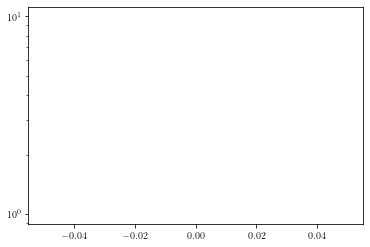

In [94]:
plt.hist(np.array(all_firm_gr).flatten(), bins=500, density=True)
plt.yscale('log')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:386: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:391: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


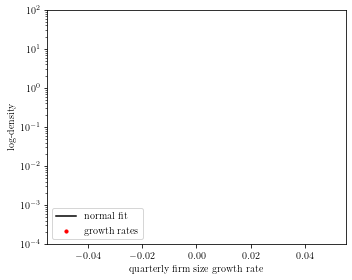

In [95]:
plt.figure(figsize=(5, 4))

data = np.array(all_firm_gr).flatten()
mean_firm_growth = np.mean(data)
x = np.linspace(-1., 3., 1000)
dens, bins, _ = plt.hist(data, bins=250, density=True, alpha=0.)
mu, sigma = stats.norm.fit(data)
best_fit_line = stats.norm.pdf(x, mu, sigma)
bins1 = bins[:-1]
bins2 = bins[1:]

bins = np.mean([bins1, bins2], axis=0)
plt.plot(x, best_fit_line, color='black', label='normal fit')
plt.scatter(bins, dens, s=10, c='red', label='growth rates')
plt.legend(loc='lower left')
plt.xlabel('quarterly firm size growth rate')
plt.ylabel('log-density')
# plt.xlim(-0.1, 0.1)
plt.ylim(10e-5, 100)
plt.axvline(mean_firm_growth, linestyle='dotted', alpha=0.5, c='black')

plt.yscale('log')
plt.tight_layout()
plt.savefig('../../plotting/validation/gr_firm_dist.pdf', bbox_inches='tight')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


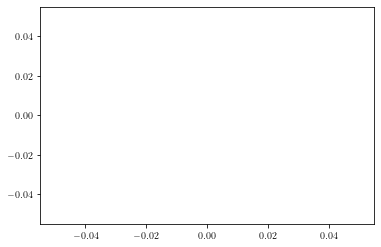

In [96]:
plt.hist(np.log(np.array(all_firm_S_norm).flatten()), bins=100, density=True)
plt.show()

In [97]:
z_frm_sk_sz, p_frm_sk_sz =  stats.skewtest(np.array(all_firm_S_norm).flatten())
z_frm_kt_sz, p_frm_kt_sz = stats.kurtosistest(np.array(all_firm_S_norm).flatten())

print(z_frm_sk_sz, p_frm_sk_sz, z_frm_kt_sz, p_frm_kt_sz)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1340: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: skewtest is not valid with less than 8 samples; 0 samples were given.

In [98]:
z_frm_sk_gr, p_frm_sk_gr =  stats.skewtest(data)
z_frm_kt_gr, p_frm_kt_gr = stats.kurtosistest(data)

ValueError: skewtest is not valid with less than 8 samples; 0 samples were given.

In [99]:
z_gdp_kt_gr, z_gdp_sk_gr, p_gdp_kt_gr, p_gdp_sk_gr

gr_dict = {
    'output growth': [z_gdp_sk_gr, p_gdp_sk_gr, z_gdp_kt_gr, p_gdp_kt_gr],
    'firm growth': [z_frm_sk_gr, p_frm_sk_gr, z_frm_kt_gr, p_frm_kt_gr],
    'firm size': [z_frm_sk_sz, p_frm_sk_sz, z_frm_kt_sz, p_frm_kt_sz]
}

NameError: name 'z_frm_sk_gr' is not defined

In [100]:
rownames = [
    'skew test stat',
    'skew p val',
    'kurt test stat',
    'kurt p val'
]

In [101]:
df_gr = pd.DataFrame(gr_dict, index=rownames).round(3)

df_gr.head()

print(df_gr.to_latex())

NameError: name 'gr_dict' is not defined

In [102]:
def plot_avg_pi(ts, ax, label, color):
    ts_reshape = np.array(ts).reshape(ts.shape[0] * ts.shape[1], 360)
    perc75 = np.percentile(ts_reshape, [12.5, 81.5], axis=0)

    ax.plot(perc75[0], color=color, linestyle='dotted', alpha=0.5)
    ax.plot(perc75[1], color=color, linestyle='dotted', alpha=0.5)
    ax.fill_between(range(360), perc75[0], perc75[1], color=color, alpha=0.2)
    ax.plot(np.mean(ts_reshape, axis=0), color=color, label=label)
    ax.set_xlim(0, 360)
    ax.set_xlabel('periods')
    ax.set_ylabel('tech level')
    ax.legend()

    return ax

In [103]:
def add_data_pi(df, indicator):
    LP_cols = [col for col in df_i if col.startswith(indicator)]
    all_ts = df_i[LP_cols]
    # all_LP_cp.append(np.transpose(df_i[LP_cols]))
    return np.transpose(df_i[LP_cols])

IndexError: tuple index out of range

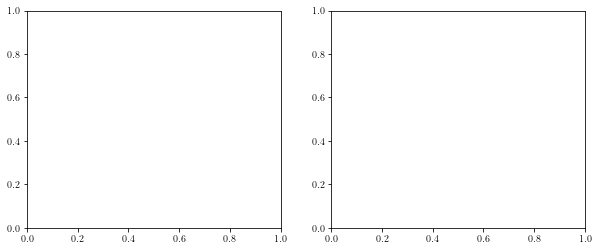

In [104]:
all_LP_cp = []
all_LP_kp = []

all_EE_cp = []
all_EE_kp = []

all_EF_cp = []
all_EF_kp = []

for df_i in df_list:
    all_LP_cp.append(add_data_pi(df_i, 'LPcp'))
    all_EE_cp.append(add_data_pi(df_i, 'EEcp'))
    all_EF_cp.append(add_data_pi(df_i, 'EFcp'))

    all_LP_kp.append(add_data_pi(df_i, 'LPkp'))
    all_EE_kp.append(add_data_pi(df_i, 'EEkp'))
    all_EF_kp.append(add_data_pi(df_i, 'EFkp'))

all_LP_cp = np.array(all_LP_cp)
all_LP_kp = np.array(all_LP_kp)

all_EE_cp = np.array(all_EE_cp)
all_EE_kp = np.array(all_EE_kp)

all_EF_cp = np.array(all_EF_cp)
all_EF_kp = np.array(all_EF_kp)

# all_LP_cp = np.array(all_LP_cp).reshape(20000, 360)
# perc75_LP_cp = np.percentile(all_LP_cp, [12.5, 81.5], axis=0)

# all_LP_kp = np.array(all_LP_kp).reshape(20000, 360)
# perc75_LP_kp = np.percentile(all_LP_kp, [12.5, 81.5], axis=0)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 4))

plot_avg_pi(all_LP_cp, ax1, '$\\bar{A}_{LP}$', 'blue')
plot_avg_pi(all_EE_cp, ax1, '$\\bar{A}_{EE}$', 'red')
plot_avg_pi(all_EF_cp, ax1, '$\\bar{A}_{EF}$', 'green')

plot_avg_pi(all_LP_kp, ax2, '$\\bar{B}_{LP}$', 'blue')
plot_avg_pi(all_EE_kp, ax2, '$\\bar{B}_{EE}$', 'red')
plot_avg_pi(all_EF_kp, ax2, '$\\bar{B}_{EF}$', 'green')

# ax1.plot(perc75_LP_cp[0], color='blue', linestyle='dotted', alpha=0.5)
# ax1.plot(perc75_LP_cp[1], color='blue', linestyle='dotted', alpha=0.5)
# ax1.fill_between(range(360), perc75_LP_cp[0], perc75_LP_cp[1], color='blue', alpha=0.2)
# ax1.plot(np.mean(all_LP_cp, axis=0), color='blue', label='$\\bar{A}_{LP}$')
# ax1.set_xlim(0, 360)
# ax1.legend()

plt.tight_layout()
plt.savefig('../../plotting/validation/tech_het.pdf')
plt.show()

In [105]:
all_LP_std = []
all_EF_std = []
all_EE_std = []

for df_i in df_list:
    LP_cols = [col for col in df_i if col.startswith('LPcp')]
    all_ts = df_i[LP_cols]
    all_LP_std.append(np.std(df_i[LP_cols], axis=1))

    EF_cols = [col for col in df_i if col.startswith('EFcp')]
    all_ts = df_i[EF_cols]
    all_EF_std.append(np.std(df_i[EF_cols], axis=1))

    EE_cols = [col for col in df_i if col.startswith('EEcp')]
    all_ts = df_i[EE_cols]
    all_EE_std.append(np.std(df_i[EE_cols], axis=1))

LP_bootstrap = stats.bootstrap((np.array(all_LP_std),), np.mean, method='percentile', n_resamples=100)
EF_bootstrap = stats.bootstrap((np.array(all_EF_std),), np.mean, method='percentile', n_resamples=100)
EE_bootstrap = stats.bootstrap((np.array(all_EE_std),), np.mean, method='percentile', n_resamples=100)

lower_LP = LP_bootstrap.confidence_interval.low
upper_LP = LP_bootstrap.confidence_interval.high

lower_EF = EF_bootstrap.confidence_interval.low
upper_EF = EF_bootstrap.confidence_interval.high

lower_EE = EE_bootstrap.confidence_interval.low
upper_EE = EE_bootstrap.confidence_interval.high

ValueError: each sample in `data` must contain two or more observations along `axis`.

IndexError: list index out of range

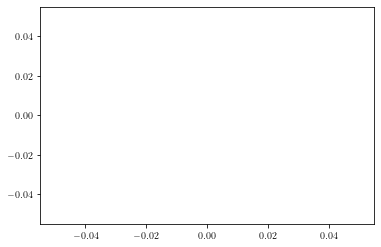

In [106]:
plt.plot(np.mean(all_LP_std, axis=0), color='blue', label='$\\bar{A}_{LP}$')
plt.fill_between(range(len(all_LP_std[0])), lower_LP, upper_LP, color='blue', alpha=0.2)

plt.plot(np.mean(all_EF_std, axis=0), color='green', label='$\\bar{A}_{EF}$')
plt.fill_between(range(len(all_EF_std[0])), lower_EF, upper_EF, color='green', alpha=0.2)

plt.plot(np.mean(all_EE_std, axis=0), color='red', label='$\\bar{A}_{EE}$')
plt.fill_between(range(len(all_EE_std[0])), lower_EE, upper_EE, color='red', alpha=0.2)

plt.axhline(0.0, linestyle='dashed', c='black', alpha=0.5)
plt.xlim(0, 360)
plt.ylim(-0.005, 0.03)
plt.ylabel('mean standard deviation')
plt.xlabel('periods')

plt.legend()
plt.tight_layout()
plt.show()

In [107]:
df_hh_income = pd.read_csv('../result_data/final_income_dists.csv')
df_hh_income.head()

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(12, 4))

ax1.scatter(df_hh_income.skills, df_hh_income.all_I)

ax2.scatter(df_hh_income.skills, df_hh_income.all_W)

ax3.scatter(df_hh_income.all_I, df_hh_income.all_W)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../result_data/final_income_dists.csv'